In [1]:
# Inport all neccessary libraries for sentiment analysis:

from textblob import TextBlob

import matplotlib.pyplot as plt

import string

import pandas as pd

from wordcloud import WordCloud

In [2]:
# Import csv file:

newdf = pd.read_csv('game_reviews.csv')

In [3]:
# Farmiliarize with data of file:

print(newdf.head(5))

   overall  verified   reviewTime      reviewerID        reviewerName  \
0        2     False  09 22, 2016  A1IDMI31WEANAF      Mackenzie Kent   
1        1     False  09 18, 2016   A4BCEVVZ4Y3V3  Jonathan Christian   
2        3      True  09 12, 2016  A2EZ9PY1IHHBX0     unpreparedtodie   
3        5      True  03 02, 2017  A139PXTTC2LGHZ              Ashley   
4        1      True  02 08, 2017  A3IB33V29XIL8O            Oghma_EM   

                                          reviewText  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  unixReviewTime image  
0  The fact that 50% of this space is wasted on a...      1474502400   NaN  
1  Another worthless Dungeon Master's screen from...      1474156800  

In [4]:
# Check for any missing values:

missingValues = newdf.isnull().values.any()
print(f"Is there any missing value? Ans:{missingValues}")

Is there any missing value? Ans:True


In [5]:
# Since there are missing values, we need to remove them:

newdf = newdf[pd.notnull(newdf['reviewText'])]
print(f"After removing null values in reviewText column:{newdf.shape}")

After removing null values in reviewText column:(14990, 9)


In [6]:
# Format accordingly so remove punctiation:

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [7]:
# Pick columns containing all reviews:

df = newdf[['reviewText']]

# Convert values to lowercase:

df= df.applymap(lambda s:s.lower() if type(s) == str else s)

# Remove punctuations:

df['reviewText'] = df['reviewText'].apply(remove_punctuations)

In [8]:
# Find out if and how many duplicates there are:

print(f"How much duplicates are in data:{df.duplicated().sum()}")

How much duplicates are in data:904


In [9]:
# Duplicates need to be removed:

df = df.drop_duplicates()
print(f"Dataframe after removing duplicated values:{df.shape}")

Dataframe after removing duplicated values:(14086, 1)


In [10]:
# Convert text into tokens, specifically words:

sentences = df['reviewText'].tolist()
words = []
for sentence in sentences:
    words.extend(sentences[0].split(' '))
    
print(f"Total Sentences are :{len(sentences)}")
print(f"Total words are     :{len(words)}")

Total Sentences are :14086
Total words are     :1126880


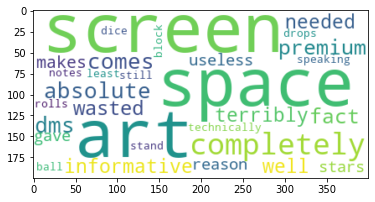

In [11]:
# Generate word cloud using the tokens:

text = " ".join(words)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
# plt.axis("off") 
plt.show()

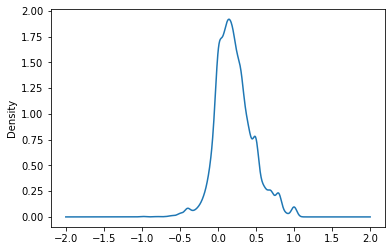

In [12]:
# Generate polarity score and plot a bell curve:

df['Polarity Score'] = df['reviewText'].apply(lambda x: (TextBlob(x).sentiment.polarity))
df = df.sort_values('Polarity Score')
ax = df['Polarity Score'].plot.kde()

In [13]:
# Identify top 20 negative and top 20 positive reviews and save them to two seperate csv files:

df['reviewText'].head(20).to_csv('Top 20 Negative Reviews.csv')
df['reviewText'].tail(20).to_csv('Top 20 Positive Reviews.csv')

In [14]:
# Print each one to see answers for further investigation:

negativedf = pd.read_csv('Top 20 Negative Reviews.csv')
positivedf = pd.read_csv('Top 20 Positive Reviews.csv')

print(negativedf)
print(positivedf)

    Unnamed: 0                                         reviewText
0         2043        kids did not like it  thought it was boring
1         3359             some of the suggestions are disgusting
2         8319  awful we did not receive what was advertised w...
3          208  booo  unles you are patient know how to measur...
4         7988  was the elf on the shelf but it didnt have the...
5         9511  i havent even taken it out of the box yet but ...
6         8758  i hate the holidays bcuz of the elf he was dis...
7        13181  i do not under stand how you keep score or rea...
8         9143    cliche and stupid i should not drink and amazon
9         9260                                        just stupid
10         182                 incomplete kit  very disappointing
11       14285  i like this product for my daughter she is int...
12        4275  ordered for my sons birthday opened it up toda...
13        4307  id like to upload a photo of the condition of ...
14       1